## Observations and Insights 

In [1]:
%matplotlib notebook

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of records prior to removing duplicates.
number_of_records = len(merged_df['Mouse ID'])
number_of_records

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_timepoint_df = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mouseID_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#--------------------
# Keep last entry for duplicate mouse ID/timepoint combination
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

In [8]:
# Checking the number of mice in the clean DataFrame.
#--------------------
# Per series output above, should expect 5 records containing duplicates to revmove
number_of_records_cleaned = len(cleaned_df['Mouse ID'])
number_of_records_cleaned

1888

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#--------------------

# 1.) Start by creating a dataframe with just Regimen and Tumor Volume 
regimen_groupby_df = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']]
# 2.) Create groupby object off of which summary statistics will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate individual summary statistics
regimen_mean = regimen_groupby_obj.mean()
regimen_median = regimen_groupby_obj.median()
regimen_variance = regimen_groupby_obj.var()
regimen_stdev = regimen_groupby_obj.std()
regimen_sem = regimen_groupby_obj.sem()

# 4.) Assemble the results into a single summary dataframe
summary_df = regimen_mean
summary_df.columns = ['Mean of Tumor Volume']
summary_df['Median of Tumor Volume'] = regimen_median
summary_df['Variance of Tumor Volume'] = regimen_variance
summary_df['Std Dev of Tumor Volume'] = regimen_stdev
summary_df['SEM of Tumor Volume'] = regimen_sem

summary_df




,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#--------------------

# 1.) Start by creating a dataframe with just Regimen and Tumor Volume 
regimen_groupby_df = cleaned_df[['Drug Regimen','Tumor Volume (mm3)']]

# 2.) Create groupby object off of which summary statistics will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate summary statistics using agg function
summary_agg_df = regimen_groupby_obj.agg(['mean','median','var','std','sem'])

# 4.) Rename columns
summary_agg_df.columns = ['Mean of Tumor Volume','Median of Tumor Volume','Variance of Tumor Volume','Std Dev of Tumor Volume','SEM of Tumor Volume']

summary_agg_df


,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


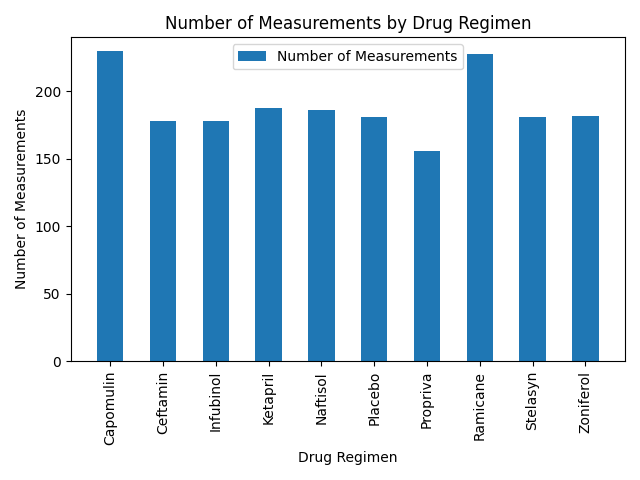

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#--------------------

# 1.) Start by creating a dataframe with just Regimen and Mouse ID
# Will then take counts of Mouse ID to create bar chart
regimen_groupby_df = cleaned_df[['Drug Regimen','Mouse ID']]

# 2.) Create groupby object off of which counts will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate counts of drug regimens
regimen_count_df = regimen_groupby_obj.count()
# Rename Mouse ID column to "Number of Measurements"
regimen_count_df = regimen_count_df.rename(columns={"Mouse ID":"Number of Measurements"})

# 4.) Set x axis and tick locations - for formatting purposes
x_axis = np.arange(len(regimen_count_df))
tick_locations = [value for value in x_axis]

# 5.) Generate pandas plot
regimen_count_plot = regimen_count_df.plot(kind="bar")

# 6.) Adjust plot properties
regimen_count_plot.set_title("Number of Measurements by Drug Regimen")
regimen_count_plot.set_xlabel("Drug Regimen")
regimen_count_plot.set_ylabel("Number of Measurements")
regimen_count_plot.set_ylim(0,max(regimen_count_df['Number of Measurements'])+10)
regimen_count_plot.set_xlim(-0.75,len(x_axis)-0.25)

# 7.) Show plot
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


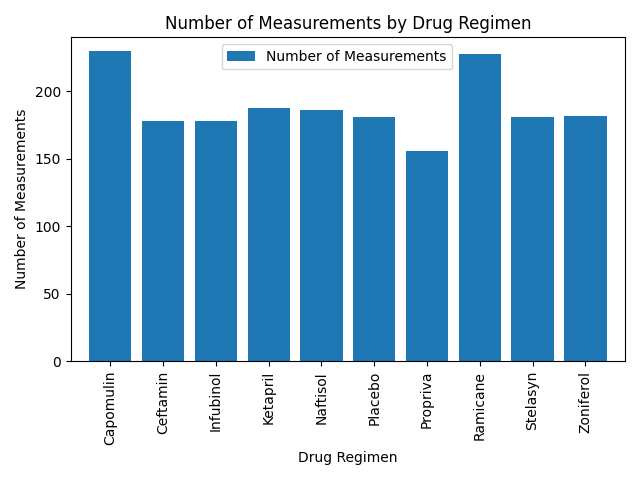

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#--------------------

# 1.) Start by creating a dataframe with just Regimen and Mouse ID
# Will then take counts of Mouse ID to create bar chart
regimen_groupby_df = cleaned_df[['Drug Regimen','Mouse ID']]

# 2.) Create groupby object off of which counts will be calculated
regimen_groupby_obj =  regimen_groupby_df.groupby('Drug Regimen')

# 3.) Calculate counts of drug regimens
regimen_count_pyplot_df = regimen_groupby_obj.count()
# Reset index so that Drug Regimen can be used as column for xticks
regimen_count_pyplot_df = regimen_count_pyplot_df.reset_index()

# 4.) Set x axis and tick locations
x_axis = np.arange(len(regimen_count_pyplot_df))
tick_locations = [value for value in x_axis]

# 5.) Generate pyplot plot in new figure and adjust properties
plt.figure()
# Use hex code in color argument of above example so graph is same color
plt.bar(x_axis,regimen_count_pyplot_df['Mouse ID'],color='#1F77B4',align='center',label="Number of Measurements")
plt.xticks(tick_locations,regimen_count_pyplot_df['Drug Regimen'], rotation="vertical")
plt.title("Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0,max(regimen_count_pyplot_df['Mouse ID'])+10)
# Use 'bbox_to_anchor' parameter to shift slightly the legend position so that it doesn't overlap with any bars
plt.legend(loc='upper center',bbox_to_anchor=(0.48, 1))

# 6.) Show plot
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


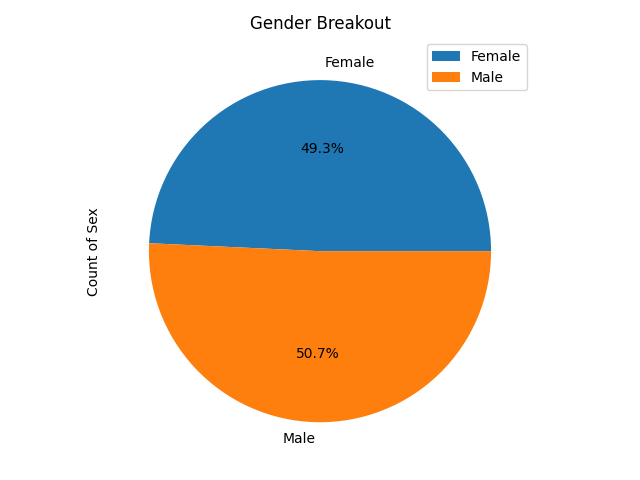

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#--------------------

# 1.) Start by creating a dataframe with just Gender and Mouse ID
# Will then take counts of Mouse ID to create pie chart
gender_groupby_df = cleaned_df[['Sex','Mouse ID']]

# 2.) Create groupby object off of which counts will be calculated
gender_groupby_obj =  gender_groupby_df.groupby('Sex')

# 3.) Calculate counts of drug regimens
gender_count_df = gender_groupby_obj.count()
# Rename Mouse ID column to "Count of Sex"
gender_count_df = gender_count_df.rename(columns={"Mouse ID":"Count of Sex"})

# 5.) Generate pandas plot
gender_pie = gender_count_df.plot(kind='pie',y='Count of Sex',autopct='%1.1f%%',title='Gender Breakout')

# 6.) Show plot
plt.show()
plt.tight_layout()




<IPython.core.display.Javascript object>


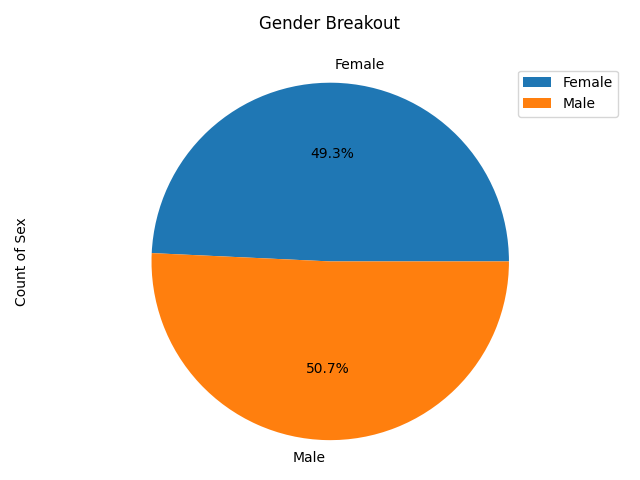

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#--------------------

# 1.) Start by creating a dataframe with just Gender and Mouse ID
# Will then take counts of Mouse ID to create pie chart
gender_groupby_df = cleaned_df[['Sex','Mouse ID']]

# 2.) Create groupby object off of which counts will be calculated
gender_groupby_obj =  gender_groupby_df.groupby('Sex')

# 3.) Calculate counts of drug regimens
gender_count_pyplot_df = gender_groupby_obj.count()
# Rename Mouse ID column to "Count of Sex"
gender_count_pyplot_df = gender_count_df.rename(columns={"Mouse ID":"Count of Sex"})
# Reset index so that Sex can be worked with as a pandas dataframe column
gender_count_pyplot_df = gender_count_pyplot_df.reset_index()
gender_count_pyplot_df

genders = gender_count_pyplot_df['Sex']
counts = gender_count_pyplot_df['Count of Sex']

# 5.) Generate pyplot plot in new figure and adjust properties
plt.figure()
plt.pie(counts, labels=genders,autopct="%1.1f%%",shadow=False)

# Use pad argument in title so that it doesn't overlap with data label
plt.title("Gender Breakout",pad=25)
plt.ylabel("Count of Sex")
plt.legend(loc='best')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# 6.) Show plot
plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#--------------------
# 1.) Create dataframe with mouse ID and greatest timepoint (use groupby/max)
greatest_timepoint_df = cleaned_df[['Mouse ID','Timepoint']]
greatest_timepoint_groupby_obj = greatest_timepoint_df.groupby('Mouse ID')
greatest_timepoint_groupby_df = greatest_timepoint_groupby_obj.max()

# 2.) Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#     Combine the data into a single dataset
greatest_timepoint_merged_df = pd.merge(cleaned_df, greatest_timepoint_groupby_df, on="Mouse ID",suffixes=("_Orig","_Max"))

# 3.) Filter merged dataset to only include records with the relevant drug regimens
treatment_regimen_df = greatest_timepoint_merged_df.loc[(greatest_timepoint_merged_df['Drug Regimen'] == 'Capomulin') |
                                                        (greatest_timepoint_merged_df['Drug Regimen'] == 'Ramicane') |
                                                        (greatest_timepoint_merged_df['Drug Regimen'] == 'Infubinol') |
                                                        (greatest_timepoint_merged_df['Drug Regimen'] == 'Ceftamin')
                                                        ]
# 4.) Filter dataset further to only include the maximum timepoints - include only records where 'Timepoint_Orig' is equal to 'Timepoint_Max'
max_timepoint_df = treatment_regimen_df.loc[treatment_regimen_df['Timepoint_Orig'] == treatment_regimen_df['Timepoint_Max']]

max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_Orig,Tumor Volume (mm3),Metastatic Sites,Timepoint_Max
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1792,x822,Ceftamin,Male,3,29,45,61.386660,3,45
1808,y163,Infubinol,Female,17,27,45,67.685569,3,45
1840,y769,Ceftamin,Female,6,27,45,68.594745,4,45
1850,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [19]:
#------------------------
# 1.) Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# 2.) Loop through each treatment, filter max_timepoint_df from above cell and calculate IQR values/print results
for treatment in treatments:
    # Set the current dataframe - filter on that specific treatment
    current_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == treatment,:]
    # Create series of final tumor volumes
    final_tumor_volumes = current_df['Tumor Volume (mm3)']
    # Calculate quartiles and interquartile range for current df
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Based on 1.5*IQR convention, determine bounds for possible outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Filter for potential outliers based off of the calculated lower and upper bounds
    outlier_df = current_df.loc[(current_df['Tumor Volume (mm3)'] < lower_bound) |
                                (current_df['Tumor Volume (mm3)'] > upper_bound)
                                ]
    # Print results for current treatment
    print(f'Showing quartile and outlier analysis for {treatment}: \n------------------------------ ')
    print(f'The lower quartile of temperatures for the {treatment} treatment is: {lowerq}')
    print(f'The upper quartile of temperatures for the {treatment} treatment is: {upperq}')
    print(f'The interquartile range of temperatures for the {treatment} treatment is: {iqr}')
    print(f'The median of temperatures for the {treatment} treatment is: {quartiles[0.5]}')
    # Logically check if there are any outliers using 1.5 * IQR convention
    if len(outlier_df) == 0:
        print(f"There are no potential outliers for the {treatment} treatment based off of the 1.5 * IQR convention\n")
    else:
        print(f"There are {len(outlier_df)} potential outliers for the treatment {treatment} based off of the 1.5 * IQR convention. Relevant records are as follows:")
        print(outlier_df)
        print("\n")

Showing quartile and outlier analysis for Capomulin: 
------------------------------ 
The lower quartile of temperatures for the Capomulin treatment is: 32.37735684
The upper quartile of temperatures for the Capomulin treatment is: 40.1592203
The interquartile range of temperatures for the Capomulin treatment is: 7.781863460000004
The median of temperatures for the Capomulin treatment is: 38.1251644
There are no potential outliers for the Capomulin treatment based off of the 1.5 * IQR convention

Showing quartile and outlier analysis for Ramicane: 
------------------------------ 
The lower quartile of temperatures for the Ramicane treatment is: 31.56046955
The upper quartile of temperatures for the Ramicane treatment is: 40.65900627
The interquartile range of temperatures for the Ramicane treatment is: 9.098536719999998
The median of temperatures for the Ramicane treatment is: 36.56165229
There are no potential outliers for the Ramicane treatment based off of the 1.5 * IQR convention



<IPython.core.display.Javascript object>


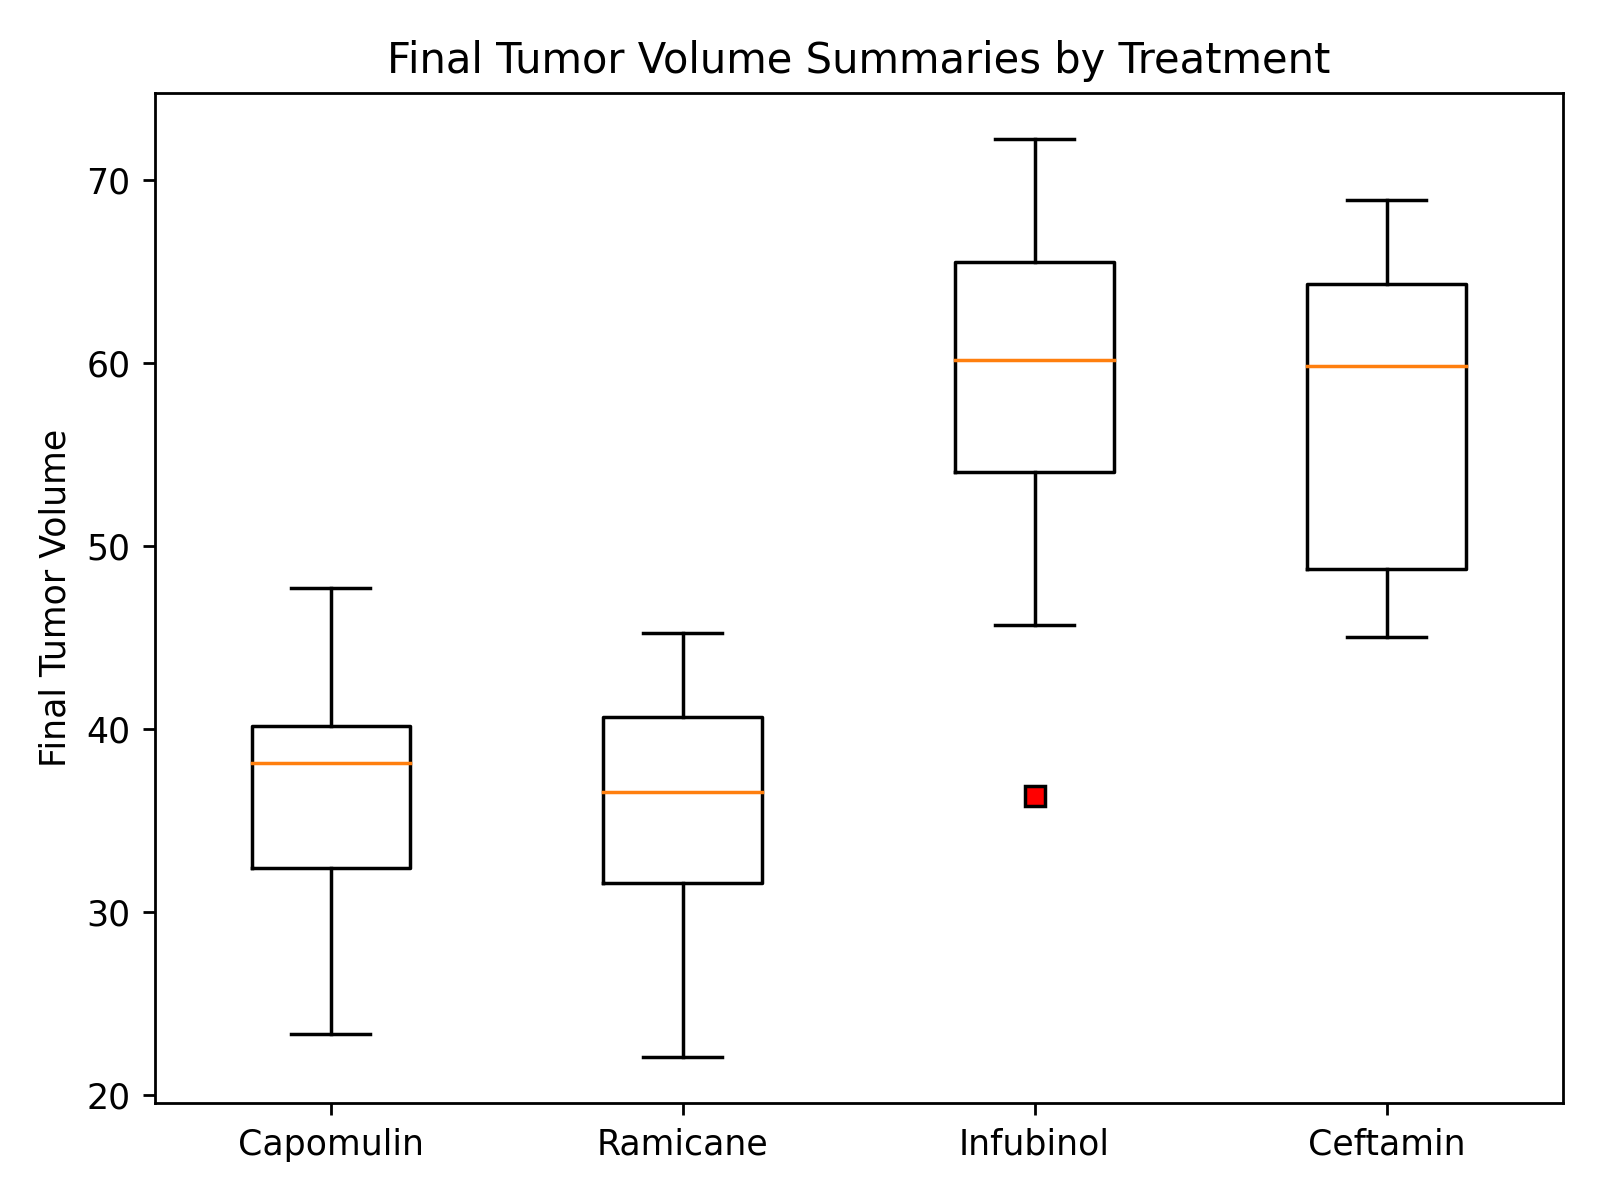

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#--------------------
# 1.) Create separate dataframes for each treatment type from max_timeplot_df above 
capomulin_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == 'Capomulin']
ramicane_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == 'Ramicane']
infubinol_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == 'Infubinol']
ceftamin_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == 'Ceftamin']

# 2.) Create series from filtered dataframes of final tumor volume to use as values for boxplots
capomulin_final_tumor_volume = capomulin_df['Tumor Volume (mm3)']
ramicane_final_tumor_volume = ramicane_df['Tumor Volume (mm3)']
infubinol_final_tumor_volume = infubinol_df['Tumor Volume (mm3)']
ceftamin_final_tumor_volume = ceftamin_df['Tumor Volume (mm3)']

# 3.) Generate boxplots
# Include all data for boxplots in 1 list
# NOTE: approach used from https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html
data = [capomulin_final_tumor_volume,ramicane_final_tumor_volume,infubinol_final_tumor_volume,ceftamin_final_tumor_volume]
data_labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']

fig, ax1 = plt.subplots()
# Set outlier display properties - NOTE: approach pulled from https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html
red_square = dict(markerfacecolor='r', marker='s')
ax1.boxplot(data,labels=data_labels,flierprops=red_square)

# 4.) Adjust labelse
ax1.set_title("Final Tumor Volume Summaries by Treatment")
ax1.set_ylabel("Final Tumor Volume")


plt.show()
plt.tight_layout()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


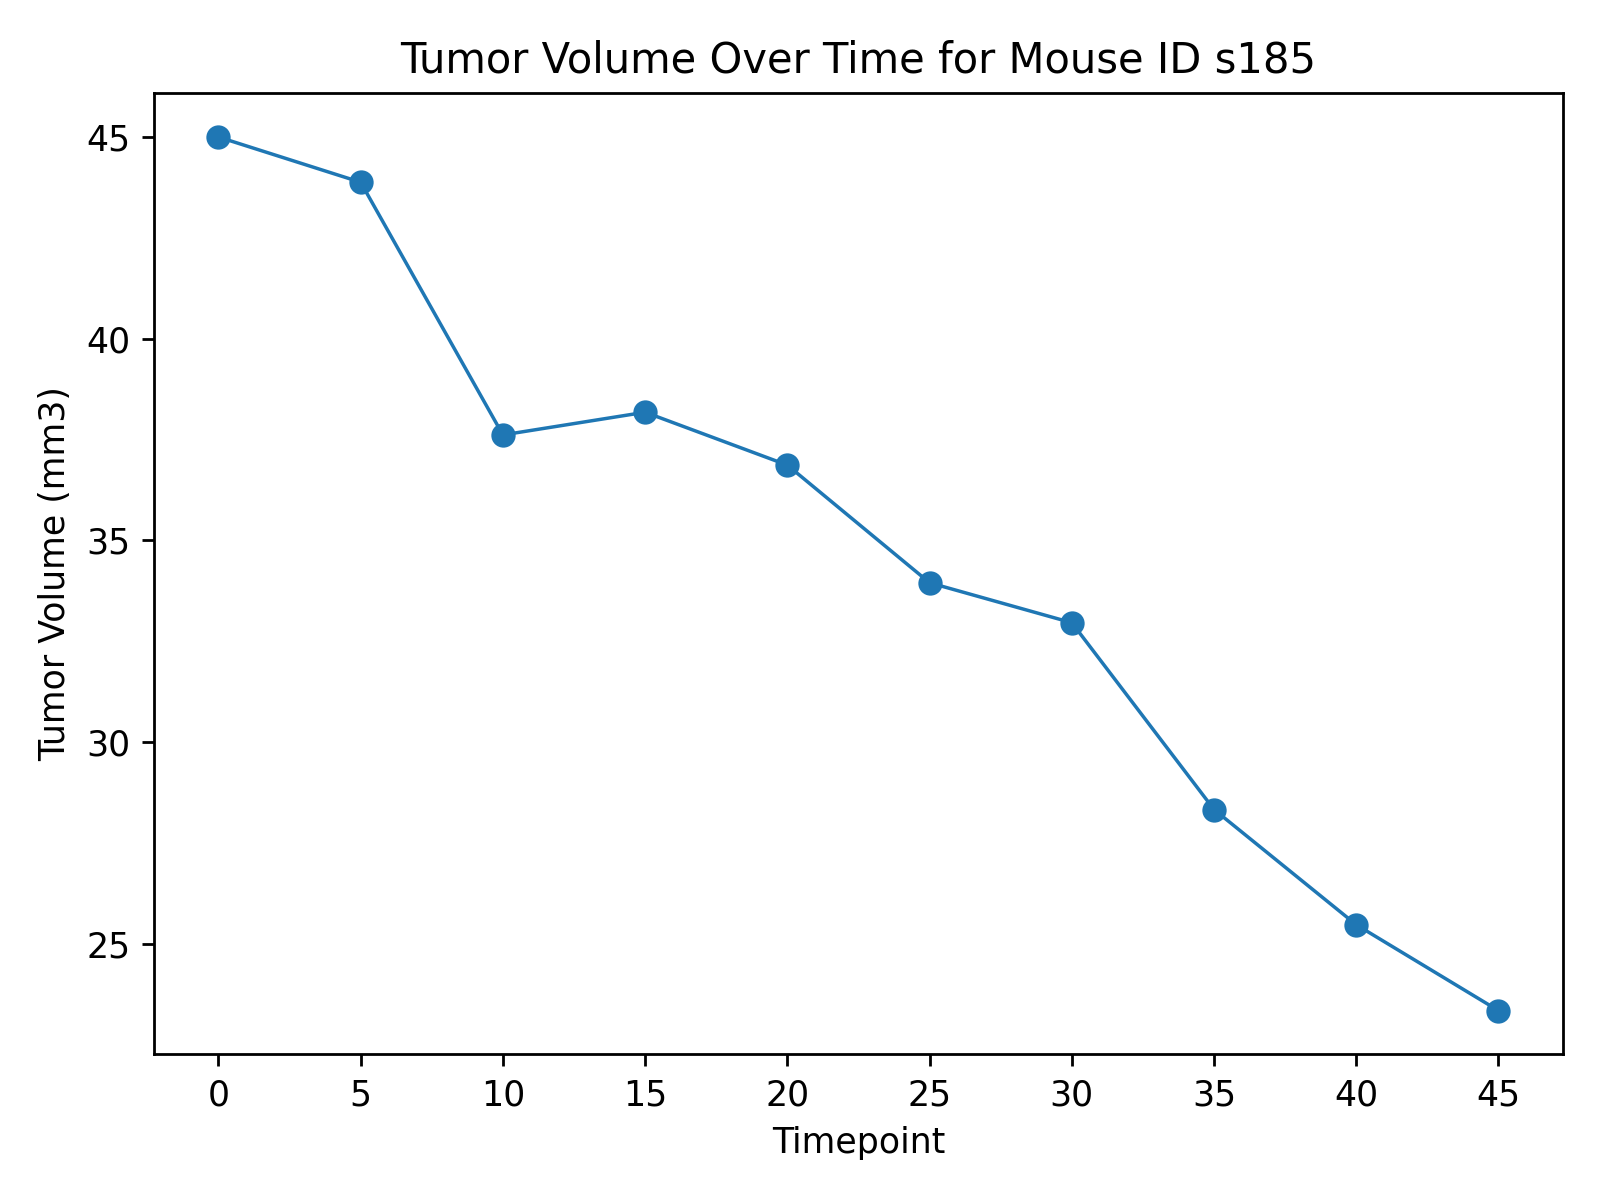

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#--------------------
# 1.) Store selected mouse ID in variable
selected_mouse_id = 's185'

# 2.) Filter original cleaned dataframe on selected mouse ID
selected_mouse_df = cleaned_df.loc[cleaned_df['Mouse ID'] == selected_mouse_id]

# 3.) Create series for x and y axis values
x_axis = selected_mouse_df['Timepoint']
y_axis = selected_mouse_df['Tumor Volume (mm3)']

# 4.) Create new figure and plot
plt.figure()
plt.plot(x_axis, y_axis,linewidth=1, marker="o")
plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 5.0))
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse ID " + selected_mouse_id)

plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


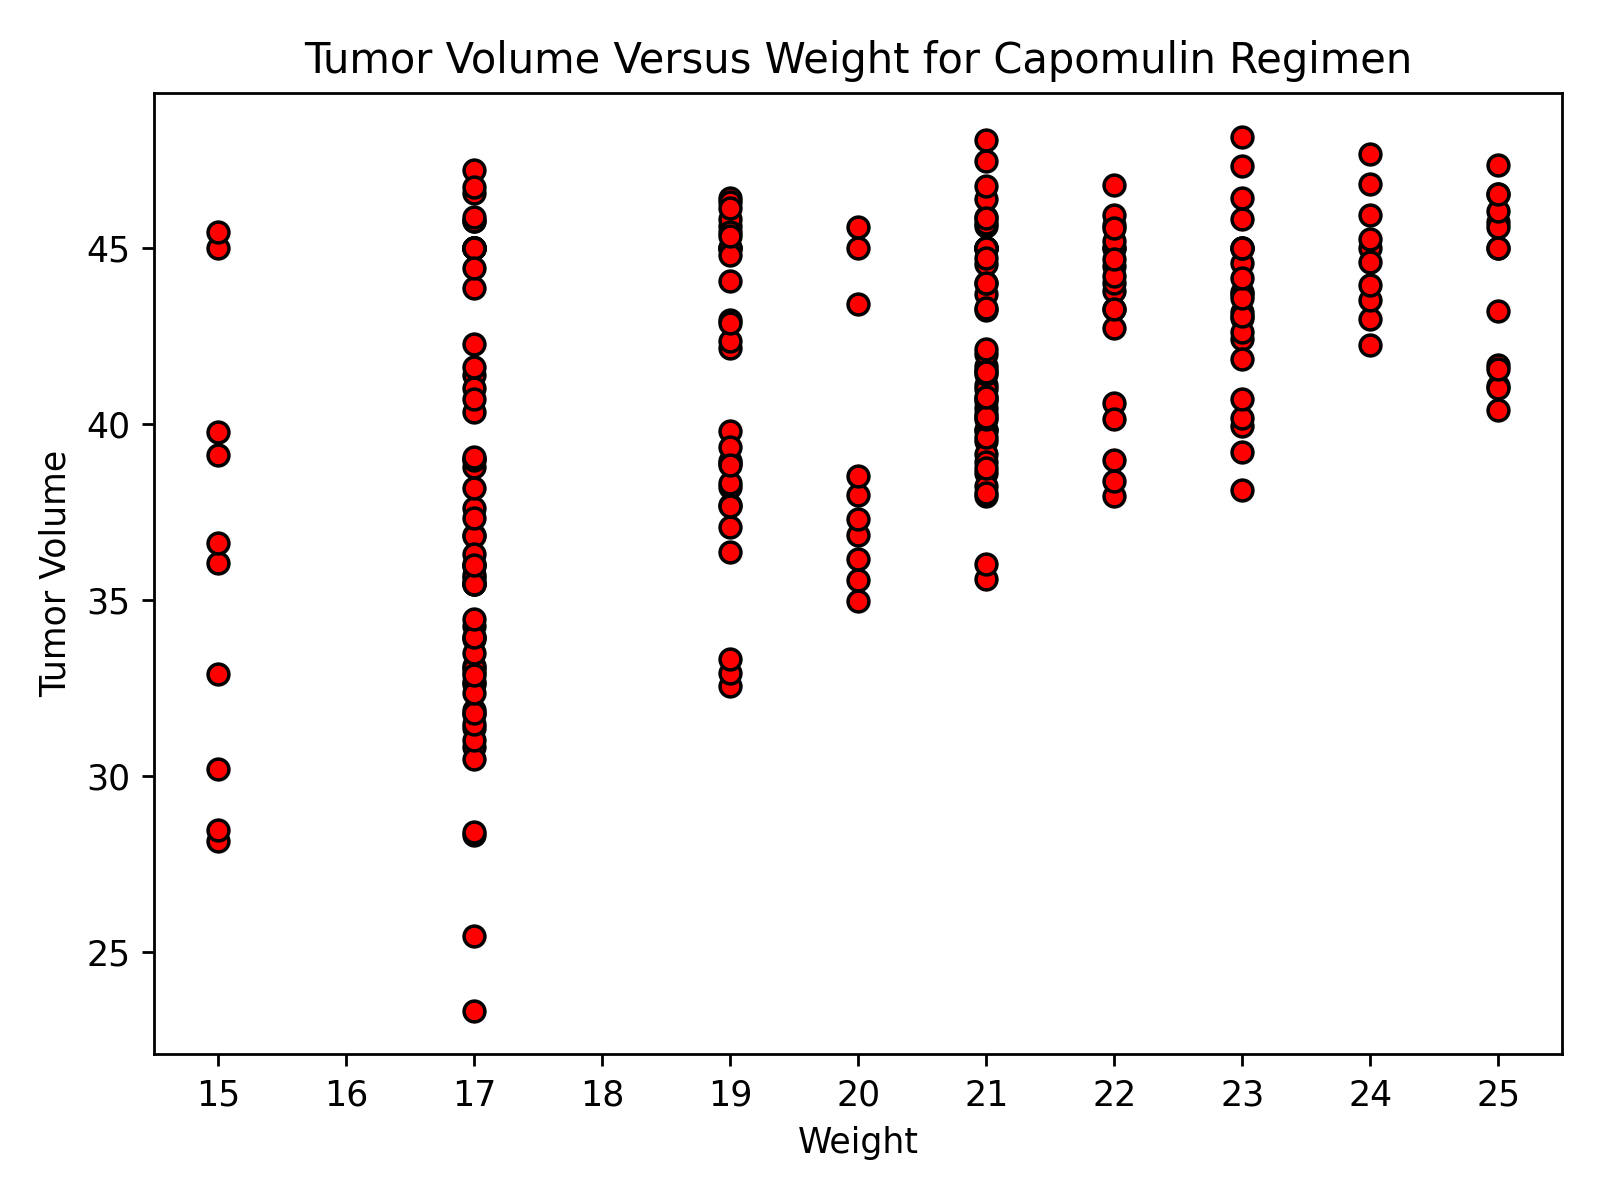

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#--------------------
# 1.) Create dataframe containing just the Capomulin regimen
capomulin_scatter_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']

# 2.) Create series containing the columns to be used in scatter plot
weight = capomulin_scatter_df['Weight (g)']
tumor_volume = capomulin_scatter_df['Tumor Volume (mm3)']

# 3.) Create figure and plot
plt.figure()
plt.scatter(weight, tumor_volume, marker="o", facecolors="red", edgecolors="black")

# 4.) Adjust labels and show
plt.title("Tumor Volume Versus Weight for Capomulin Regimen")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.xticks(np.arange(min(weight), max(weight)+1, 1.0))

plt.show()
plt.tight_layout()

## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen